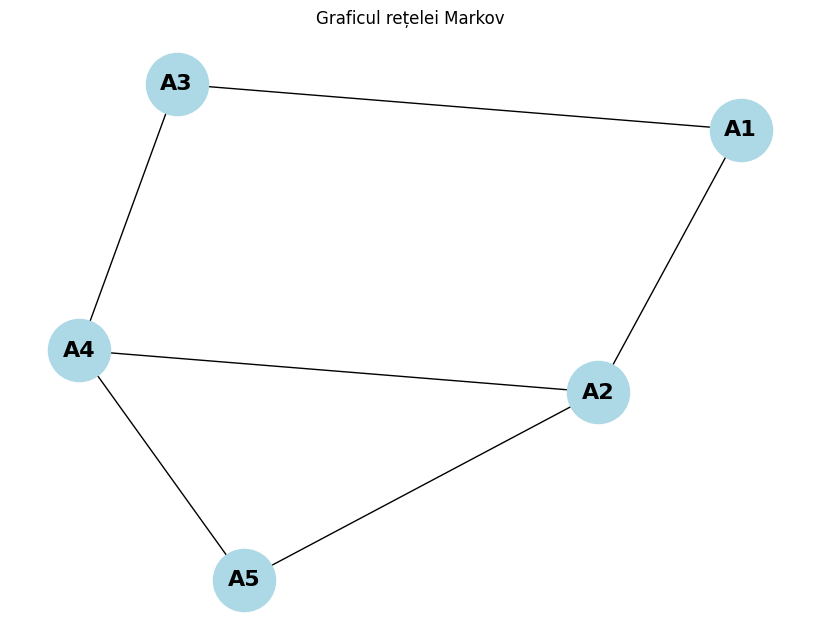

Clicile modelului:
['A4', 'A2', 'A5']
['A4', 'A3']
['A1', 'A2']
['A1', 'A3']

Probabilitatea comună a variabilelor:
+-------+-------+-------+-------+-------+-----------------------+
| A1    | A2    | A3    | A4    | A5    |   phi(A1,A2,A3,A4,A5) |
+=======+=======+=======+=======+=======+=======================+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(0) |                0.0454 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(1) |                0.0050 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(0) |                0.0013 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(1) |                0.0003 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | A4(0) | A5(0) |                0.0202 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | 

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import MarkovNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import DiscreteFactor

edges = [
    ('A1', 'A2'), 
    ('A1', 'A3'), 
    ('A2', 'A4'), 
    ('A2', 'A5'), 
    ('A3', 'A4'), 
    ('A4', 'A5')
]

model = MarkovNetwork(edges)

plt.figure(figsize=(8, 6))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', arrows=True)
plt.title('Graficul rețelei Markov')
plt.show()

cliques = list(nx.find_cliques(G))
print("Clicile modelului:")
for clique in cliques:
    print(clique)

pot_A1_A2 = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2], values=[0.5, 0.5, 0.5, 0.5])
pot_A1_A3 = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2], values=[0.5, 0.5, 0.5, 0.5])
pot_A2_A4 = DiscreteFactor(variables=['A2', 'A4'], cardinality=[2, 2], values=[0.7, 0.3, 0.9, 0.1])
pot_A2_A5 = DiscreteFactor(variables=['A2', 'A5'], cardinality=[2, 2], values=[0.8, 0.2, 0.6, 0.4])
pot_A3_A4 = DiscreteFactor(variables=['A3', 'A4'], cardinality=[2, 2], values=[0.9, 0.1, 0.4, 0.6])
pot_A4_A5 = DiscreteFactor(variables=['A4', 'A5'], cardinality=[2, 2], values=[0.6, 0.4, 0.7, 0.3])
pot_A2_A4_A5 = DiscreteFactor(variables=['A2', 'A4', 'A5'], cardinality=[2, 2, 2], values=[0.6, 0.4, 0.3, 0.7, 0.5, 0.5, 0.2, 0.8])

model.add_factors(pot_A1_A2, pot_A1_A3, pot_A2_A4, pot_A2_A5, pot_A3_A4, pot_A4_A5, pot_A2_A4_A5)

assert model.check_model()

inference = VariableElimination(model)
joint_distribution = inference.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])

print("\nProbabilitatea comună a variabilelor:")
print(joint_distribution)

state_map = [(i, j, k, l, m) for i in range(2) for j in range(2) for k in range(2) for l in range(2) for m in range(2)]

max_prob_state_index = joint_distribution.values.argmax()

max_state = state_map[max_prob_state_index]
print(f"\nStarea cu probabilitate maximă: {max_state}, cu probabilitate: {joint_distribution.values[max_prob_state_index]}")
